# Week 11 Prac
About The Data
We'll be using the Credit Card Dataset from kaggle for this lab, but feel free to follow along with your own dataset. We will develop
a customer segmentation to define marketing strategy. The sample Dataset summarizes the usage behavior of about 9000 active
credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables:
CUSTID : Identification of Credit Card holder (Categorical)
BALANCE : Balance amount left in their account to make purchases (
BALANCEFREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not
frequently updated)
PURCHASES : Amount of purchases made from account
ONEOFFPURCHASES : Maximum purchase amount done in one‑go
INSTALLMENTSPURCHASES : Amount of purchase done in installment
CASHADVANCE : Cash in advance given by the user
PURCHASESFREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased,
0 = not frequently purchased)
ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one‑go (1 = frequently purchased, 0 = not
frequently purchased)
PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 =
not frequently done)
CASHADVANCEFREQUENCY : How frequently the cash in advance being paid
CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"
PURCHASESTRX : Numbe of purchase transactions made
CREDITLIMIT : Limit of Credit Card for user
PAYMENTS : Amount of Payment done by user
MINIMUM_PAYMENTS : Minimum amount of payments made by user
PRCFULLPAYMENT : Percent of full payment paid by user
TENURE : Tenure of credit card service for user


# Implementation

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
rcParams['figure.figsize'] = 15, 5
sns.set_style('darkgrid')
from sklearn.datasets import load_iris

In [20]:
cc_df = pd.read_csv('cc.csv')
cc_df.drop('CUST_ID', axis = 1, inplace=True)
cc_df['MINIMUM_PAYMENTS'].fillna(value=cc_df['MINIMUM_PAYMENTS'].mean(), inplace = True)
cc_df['CREDIT_LIMIT'].fillna(value=cc_df['CREDIT_LIMIT'].mean(), inplace = True)
cc_df.head()

C:\Users\Bebe\AppData\Local\Temp\ipykernel_11756\3694612027.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cc_df['MINIMUM_PAYMENTS'].fillna(value=cc_df['MINIMUM_PAYMENTS'].mean(), inplace = True)
C:\Users\Bebe\AppData\Local\Temp\ipykernel_11756\3694612027.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting val

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


### Different example

In [21]:
# Load the Iris dataset
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [22]:
cc_df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [23]:
from sklearn.preprocessing import StandardScaler, normalize
scaler = StandardScaler()
scaled_df = scaler.fit_transform(cc_df)
normalized_df = normalize(scaled_df)
# Converting the scaled data back into a pandas DataFrame
normalized_df = pd.DataFrame(data=normalized_df)

In [24]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_principal = pca.fit_transform(normalized_df)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']
X_principal.head()

,P1,P2
0,-0.489826,-0.679678
1,-0.518791,0.545011
2,0.330885,0.268978
3,-0.482374,-0.092111
4,-0.563289,-0.481915


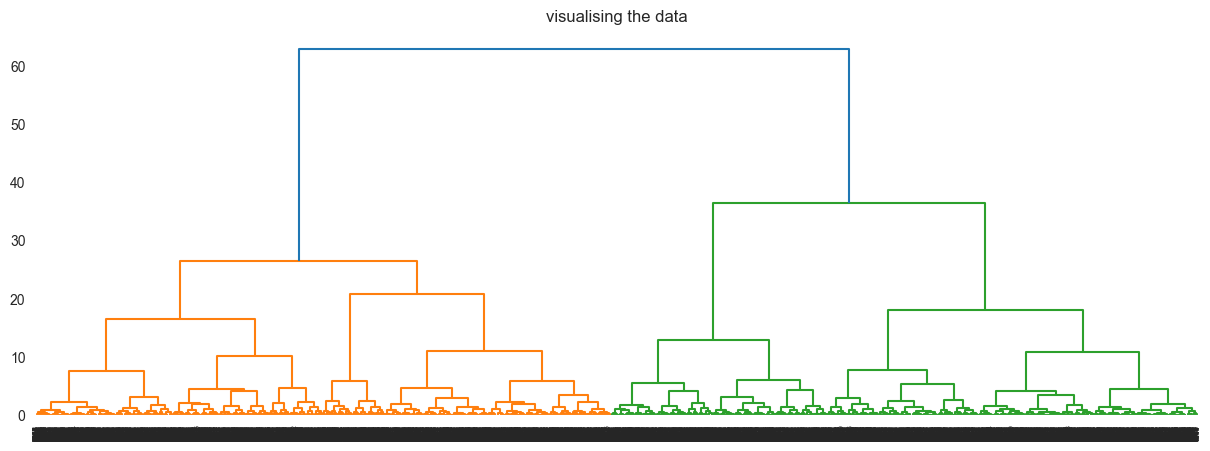

In [25]:
import scipy.cluster.hierarchy as shc
plt.title('visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(X_principal, method ='ward')))

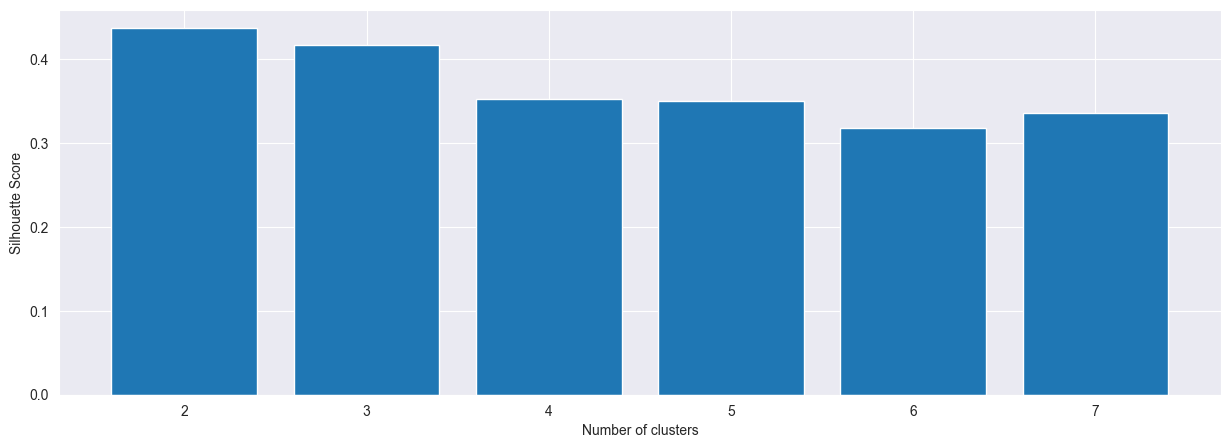

In [26]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
# where we'll save scores for later plotting
silhouette_scores = []
# testing different cluster values in range [2,8﴿
for n_cluster in range(2, 8):
    silhouette_scores.append(silhouette_score(X_principal,
    AgglomerativeClustering(n_clusters = n_cluster).fit_predict(X_principal)))
# Creating bar graph to compare the results. You can use a line plot if you prefer ﴾similar to K Means lab﴿
plt.bar(x=range(2, 8), height=silhouette_scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [27]:
# creating and fitting model
agg = AgglomerativeClustering(n_clusters=3)
agg.fit(X_principal)

AgglomerativeClustering(n_clusters=3)

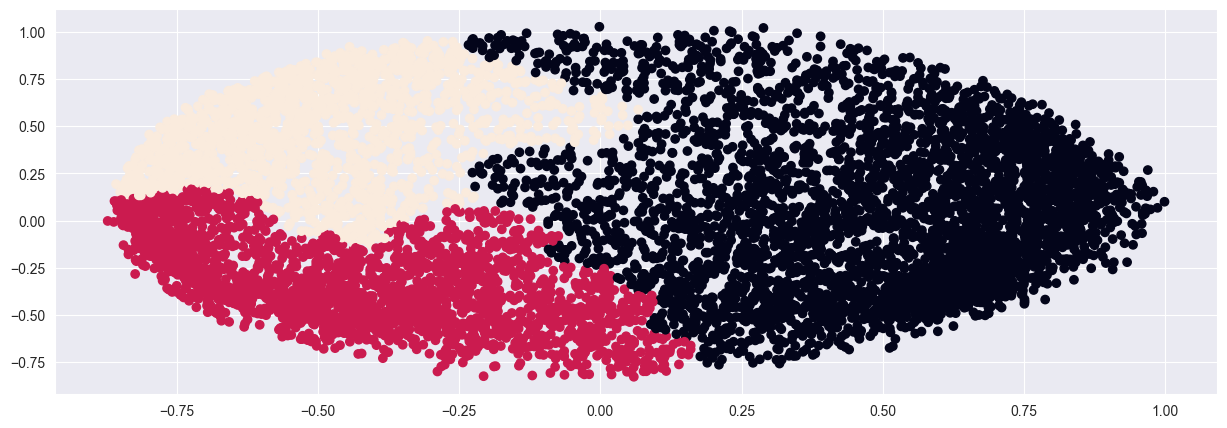

In [28]:
# Visualizing the clustering
plt.scatter(X_principal['P1'], X_principal['P2'],
c = AgglomerativeClustering(n_clusters = 3).fit_predict(X_principal))
plt.show()

### Different example using the iris dataset

In [29]:
# Standardize the data
scaler = StandardScaler()
scaled_df = scaler.fit_transform(iris_df)

In [30]:
# Normalize the data
normalized_df = normalize(scaled_df)
normalized_df = pd.DataFrame(data=normalized_df, columns=iris.feature_names)

In [31]:
# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
X_principal = pca.fit_transform(normalized_df)
X_principal = pd.DataFrame(X_principal, columns=['P1', 'P2'])

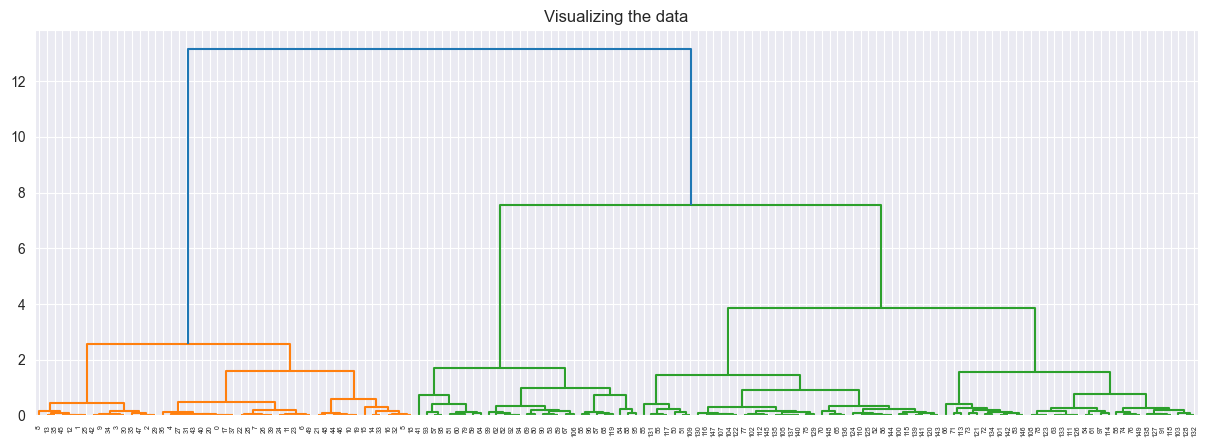

In [32]:
plt.title('Visualizing the data')
Dendrogram = shc.dendrogram(shc.linkage(X_principal, method='ward'))
plt.show()

In [33]:
silhouette_scores = []
for n_cluster in range(2, 8):
    labels = AgglomerativeClustering(n_clusters=n_cluster).fit_predict(X_principal)
    silhouette_scores.append(silhouette_score(X_principal, labels))

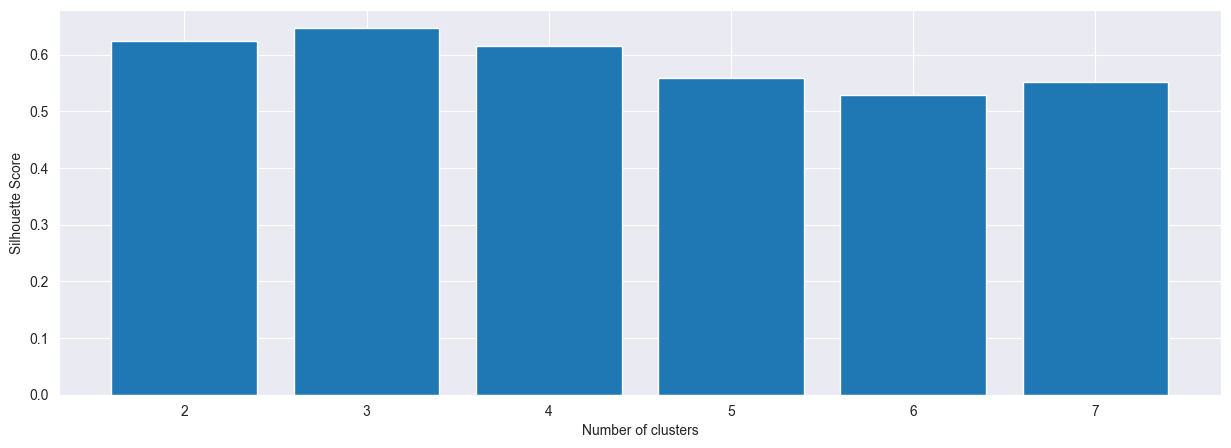

In [34]:
# Plot silhouette scores
plt.bar(range(2, 8), silhouette_scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [35]:
agg = AgglomerativeClustering(n_clusters=3)
labels = agg.fit_predict(X_principal)

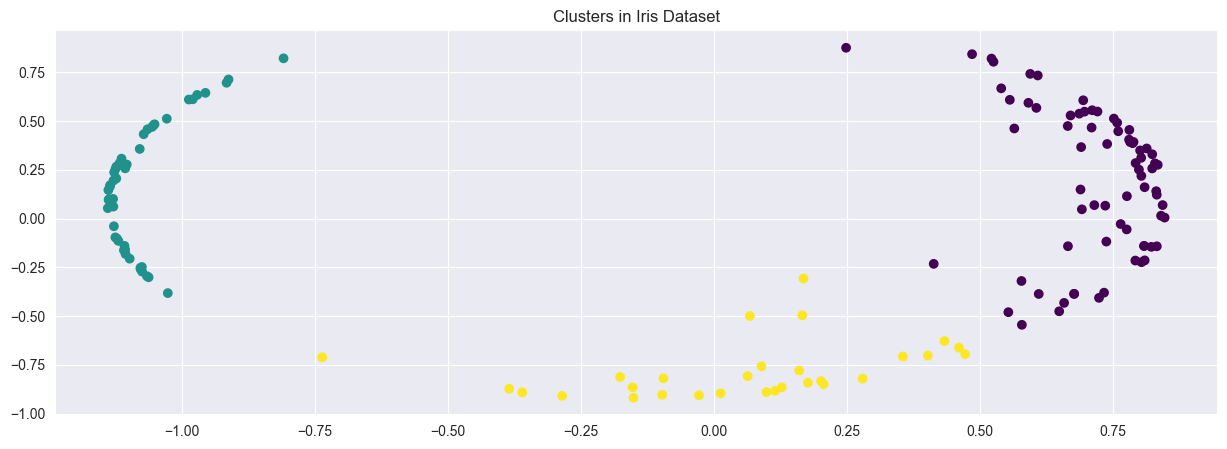

In [36]:
plt.scatter(X_principal['P1'], X_principal['P2'], c=labels, cmap='viridis')
plt.title("Clusters in Iris Dataset")
plt.show()